# CS102/CS103: Week 11 - Classes and Objects <span style='color:green'>(V1.1)</span>


**Lecture notes for Week 11 of CS102/CS103, 07 + 08 December, 2022.**

Dr [Niall Madden](mailto:Niall.Madden@UniversityOfGalway.ie), School of Mathematical and Statistical Sciences, 
University of Galway.
            
You can find these notes at:
    
* Interactive Jupyter notebook on **Binder** [https://mybinder.org/v2/gh/niallmadden/2223-cs103/main](https://mybinder.org/v2/gh/niallmadden/2223-cs103/main) 
* Slides, HTML, and downloadable `.ipynb` files: [https://www.niallmadden.ie/2223-CS103](https://www.niallmadden.ie/2223-CS103) - HTML, Slides, and 
* Github repository: [https://github.com/niallmadden/2223-cs103](https://github.com/niallmadden/2223-cs103)
    * (If you use `git`, try: `git clone https://github.com/niallmadden/2223-cs103`)

Links also on Blackboard.

***

<div class="rc"><font size="5"><em>This notebook was written by Niall Madden, and uses some material from <a href="https://greenteapress.com/thinkpython2/html">Think Python</a>, as well as notes by Tobias Rossmann.</em></div>

## What we are doing this week:

1. Learning about Object Oriented Programming
2. Classes and Objects and Methods and Operators
3. Some examples of writing our own class: time of day, and rolling some dice.
4. Dunder methods
5. Operator overloading


## News

### Lab 8 (Project) this week

Lab 8 is an open-ended assignment, to be completed by 13 Jan 2023 (end of Week 1 of Semester 2). It is a little similar in style to Labs 3 and 5: you'll write and upload your own Jupyter notebook. 

See the files on Blackboard for more information.


### Plans for the rest of the semester 

* Today (7th December) **MY127** instead of BLE-2012 both days.  You'll need to bring your own laptop to MY127. 
* Next week: no labs.
* Next week: class test on Wednesday. More info below.
* Next week: last lecture  Thursday at 9am.

### Assessment Summary

The assessment for CS103, and this part of CS102 is as follows:
1. Lab 1: 5%
2. Lab 3: 20% (all graded; if you didn't get a grade, talk to Niall)
3. Lab 5: 20% (will be graded by 12 December)
4. Lab 6: 10% (to be graded Friday)
5. Lab 7: 10% (to be graded next week)
6. Class test in Week 10: 10% (more of this presently)
7. Lab 8/Project: 25% (due in 13 Jan, 2023)

### Class test in Week 12

There will be a test on Wednesday of Week 12 (14 December). 

* The test will be on fundamental topics in Python, up to, but not including dictionaries (well... not much: see sample text paper).
* It will be online, though you are welcome to come to the lecture and do it there, and ask questions.
* It will run form 9 to 5 is designed to take no more than 50 minutes, but everyone will have 2 hours to complete it. 
* The test is designed to take no more than 50 minutes, but everyone will have 2 hours to complete it. 
* You can do the test anywhere you want.
* It is "Open Book": you any resources you like, including lecture notes. In particular, you should have a Jupyter notebook handy to check code.
* But you _can_ collaborate with class-mates, but you should not get assistance from anyone else.

### Want some more exercises?

If you are enjoying coding in Python, maybe try the "Advent of Code" [https://adventofcode.com/](https://adventofcode.com).

This proposes a new programming challenge each day until Christmas, usually with some "Santa"-related theme.

Have fun!


# Object-oriented programming

Our last "big" topic in this module is the concept of **Object-oriented programming**, and, specifically, the definitions of our own **classes** and **objects**.


These topics are covered in Chapters 15 to 18 of Think Python. It takes four chapters because
* For ones, the book is very slow at getting to the point
* The concepts involved are complicated, and so some pacing is required.



## The basic idea: a class

Python comes with many built-in functions, such as `print()`. We have learned we can write our own functions too.

Python also comes with many built-in **classes**, such as `int`, `str`, and `list`. These are used to represent "_things_", such as integers, words and sentences, and collections. 

Now we are going to learn how to write our own  classes, for example to represent times or dates or factions (i.e., rational numbers).

What makes a **class** special is that we define both the data it can represent, and functions for operating on it. We'll call these "_methods_" or "_operators_", depending on the context.

We'll also learn about **objects** which are "instances" of classes. 


## The basic idea: an object

An **object** is an _instance_ of a class. Examples:

* `"Hello"` is an object belonging to the `str` class.
* If we set `x=12`, then `x` is an object belonging to the `int` class.
* If we set `words=["Here", "are", "some", "words"]`, then `words` is an object of the `list` class.

So objects can be 
* literals, such as `"Hello"` or 
* variables.

## The basic idea: methods

A **method** is a function that is specific to a class. 

For example if we define the string object `word`, we can apply the following methods:

In [1]:
word = "ThisIsALongWord"
type(word)

str

In [2]:
word.count('o') # number of times `o` appeards

2

In [3]:
word.lower() # convert to lower case

'thisisalongword'

In [4]:
word.strip("Tdh")

'isIsALongWor'

## The basic idea: operators

We are familiar with the arithmetic and logical operators such as `+`, `-`, `*`, `==`, `>=` and so on, and in particular, how they apply to numeric objects. These can also be defined for a class (where it makes sense to do so).

In [5]:
word1 = "Hello"
word2 = "there"

In [6]:
word1+word2

'Hellothere'

In [7]:
word1<word2

True

Not every operators works. For example, we can't multiply two strings, though we can multiply a string by an `int`.

In [8]:
word1*2

'HelloHello'

So, our goal now is to define a class of our own, and some operators and methods to apply to objects belonging to that class. That is, we'll define an class and its objects' _attributes_:

* **Data attributes** store values.

* **Methods** (= method attributes) are used to implement operations.

To get started, we'll have to learn several things at ones:
* the `class` key-word is used to define a class
* the `__init__()` function is a function that is called automatically when ever a new object of that class is defined. (This is called a **constructor** in most programming languages)
* the `self` "variable" which is used in the code to represent the object for which a method is being called.

# Our first example: `Time`

(See Chapter 17 for more detail)
We'll start by defining a class that represents a time of day. For that we'll use the new key-word `class`.
We'll also have a doc-string, which is the same as a function.

And it will have:
* The data attributes `hour`, `minute`, `second`
* The `__init__` function that sets the time to `00:00:00`


In [9]:
class MyTime:
    """Represents the time of day. Attributes: hour, minute, second"""
    def __init__(self, hour=0, minute=0, second=0):
        self.hour = hour
        self.minute = minute
        self.second = second

Now we define a time:

In [10]:
time1 = MyTime() # note no arguments

And check its attributes

In [11]:
time1.hour 

0

In [12]:
print(" time1.hour =", time1.hour, "\n time1.minute =",time1.minute,
      "\n time1.second =",time1.second)

 time1.hour = 0 
 time1.minute = 0 
 time1.second = 0


In that previous example, we made use of the **default** arguments to the function. So here is another example.

In [13]:
time2 = MyTime(13, 46, 7)

In [14]:
print(" time2.hour =", time2.hour, "\n time2.minute =",time2.minute, 
      "\n time2.second =",time2.second)

 time2.hour = 13 
 time2.minute = 46 
 time2.second = 7


In [15]:
print(f"Time:{time2.second : 04d}")

Time: 007


Displaying the time is a very common task. So we'll write a _method_ for that, called `print_time()`. 

We'll use an f-string. Recall that, in an f-string:
* `{x}` displays the value of the variable `x`
* `{x : 2d}` displays the value of the `int` variable `x` allowing for at least 2 digits (and adding space if needed)

We now we will use
* `{x : 02d}` displays the value of the `int` variable `x` allowing for at least 2 digits, and add `0`s if needed.


In [16]:
class MyTime:
    """Represents the time of day. Attributes: hour, minute, second"""
    def __init__(self, hour=0, minute=0, second=0):
        self.hour = hour
        self.minute = minute
        self.second = second
    def print_time(self):
        print(f'{self.hour:02d}:{self.minute:02d}:{self.second:02d}')

In [17]:
time1 = MyTime()

In [18]:
time1.print_time()

00:00:00


In [19]:
time2 = MyTime(9,14,16)
time2.print_time()

09:14:16


<div class="alert alert-block alert-info">
    Finished here Wednesday
</div>

# Arcane Interlude 10: You are just not that popular (on average)

One of my favourite Python modules is `networkx` which is used to represent graphs and networks.

In this example, we'll use it to verify the "_Friendship Paradox_": most people have fewer friends than their friends do.

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import statistics

In [21]:
# Make a random graph
G = nx.erdos_renyi_graph(150, 0.04) 

In [22]:
def cart_wheel(n):
    Edges = []
    for i in range(n-1):
        Edges += [(i, (i+1)%(n-1))]
    for i in range(n-1):
        Edges += [(n-1,i)]
    return Edges   
# G = nx.Graph(cart_wheel(10))

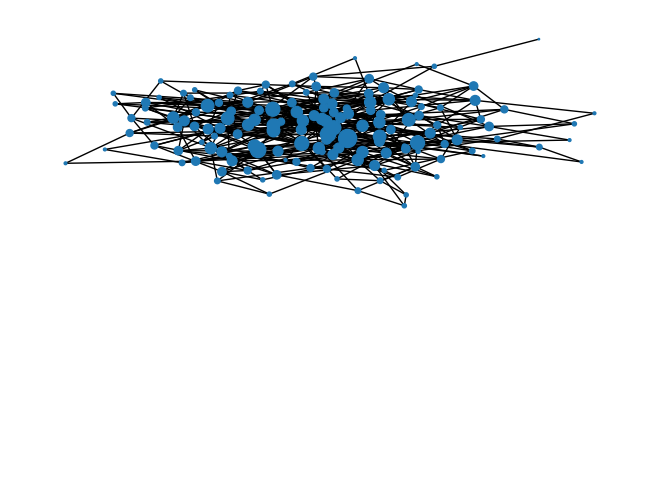

In [23]:
R = []
for d in dict(G.degree).values():
    R += [d**2]
nx.draw(G, node_size = R)

In [24]:
def ave_friends_friends(G, n):
    res = 0
    for f in G.neighbors(n):
        res += G.degree(f)
    return res/G.degree(n)

In [25]:
paradox_holds,paradox_fails=0,0
for n in G.nodes:
    if G.degree(n) < ave_friends_friends(G,n):
        paradox_holds+=1
    else:
        paradox_fails+=1
    #print(f" degree({n:3d})={G.degree(n)}.  FoF = {ave_friends_friends(G,n)}")
    
print(f"Paradox holds {paradox_holds} times and fails {paradox_fails} times.")

ZeroDivisionError: division by zero

# Another example: one die, two dice

To recap on the key ideas in classes and objects in Python, let's build class that produces dice containing a user-specified number of sides.


* Each `VarioDie` instance will **know** two things:
  1. its number of side, $s$, and
  2. its current value.
  

* In addition, each `VarioDie` instance can **do** something:
  to `roll` a die means to produce a random value between `1` and the total number of its sides.

* Interacting with such objects may look as follows.

```python
die = VarioDie(12) # create new 12-sided die 
die.roll()         # roll the die
die.value          # check its value
die.roll()         # roll it again die
die.value          # check its value

```

## Class definitions

Reminder: In Python, classes are defined using the `class` statement. Its basic form is:

```python
class Name:
    <body>
```

* The name of a class can be any valid identifier.
* The body of a class definition consists of statements, indented as usual.

In practice, the body usually consists of a sequence of one or more _method_ (i.e., function) definitions.

* If one of these is `__init__()` which is called automatically when an object of that class is defined (and the class name is treated as a function).

* `__init__()` is an example of a _special method_. Often, it is read out loud as "_dunder init_", where "_dunder_" is short for "_double underscore_".



## Methods

Syntax for a method is:

```python
class Name:
    def my_method(<arg>):
        <method body>
```


Then, if (for example) the variable `n` is of type `Name`, we can call this method as `n.my_method(<arg>)`
 

## Data attributes

If a method crates a new variable, it becomes a data attribute of the associated object. Use the `dot` notation to access it.


## `self`
Within the methods defined in the class, by custom we use the place-holder variable `self` to refer to the object for which the method is being called.

In [ ]:
class Name:
    def my_fn(self):
        self.x=-1

In [ ]:
n = Name()

In [ ]:
n.my_fn() # Note: before now, n.x does not exist.

In [ ]:
n.x

## Naming conventions 
It is customary (but not required) to distinguish class names from names of variables and methods.

One common way is to use partial capitalisation, e.g.
  * `SomeDataType` (a class)
  * `do_something()` (a method or function)
  * `some_value` (a variable or data attribute)

## Finally, the `VarioDie` class
Let's define the `VarioDie` class.

We'll need the `random` module for rolling.

In [ ]:
import random # need this for rolling

Now we'll define the class. It will have **two methods**:
* the constructor `__init__()`, which sets the number of sides, and a default value of 1.
* `roll()` to change the value to something random between 1 and the number of sides.

There will be **two variables**:
* `.sides`, which is the number of sides on the die.
* `.value`, the result of the last roll.

Here is the definition.

In [ ]:
class VarioDie:
    def __init__(self, sides): # two underscores on each side!
        self.sides = sides
        self.value = 1
        
    def roll(self):
        self.value = random.randint(1, self.sides)

## `self` again

* Each method definition in a class has a **special first parameter**.
* It is called `self` (by convention) and refers to the instance of the class that the method is acting upon.

* That is, when the function is called as a method as 
```python
   die.roll()
```
then the function `roll()` is called with  `die` as the value of `self`.

## Let's roll ...

In [ ]:
die = VarioDie(6) # make a 6 sided die
die.value         # 1 is default

In [ ]:
die.sides

In [ ]:
die.roll()
die.value

In [ ]:
print(die)

In [ ]:
die2 = VarioDie(13)
die2.value

In [ ]:
die2.sides

In [ ]:
for i in range(1,4): # roll 3 times
    die.roll()
    die2.roll()
    print(f"die1: {die.value}, \t die2: {die2.value}")

# More "dunder" functions

We've already seen that there is a special function called `__init__()`. In fact, many more exist.

We'll just look at one now, called `__str__`. 


Let's recall the `MyTime` class.

In [ ]:
class MyTime:
    """Represents the time of day. Attributes: hour, minute, second"""
    def __init__(self, hour=0, minute=0, second=0):
        self.hour = hour
        self.minute = minute
        self.second = second
    def print_time(self):
        print(f'{self.hour:02d}:{self.minute:02d}:{self.second:02d}')

In [ ]:
now = MyTime(9,37,8)

In [ ]:
now.print_time()

Given than `now` represents a typical value, we would like to be able to display it using `print()`, as we would any other type.

However, the output is not what we might expect;

In [ ]:
print(now)

That is, by default we just get a memory address of the object. But we can change that...

## The `__str__` method

If you define the `__str__` method for a class, and then call `print()` for an object, the return value from `__str__` is displayed. 


More precisely, it defines what is returned by the `str()` function, which is then used (automagically) by `print()`.

Note that we can used f-strings.

In [ ]:
class MyTime:
    """Represents the time of day. Attributes: hour, minute, second"""
    def __init__(self, hour=0, minute=0, second=0):
        self.hour = hour
        self.minute = minute
        self.second = second
    def print_time(self):
        print(f'{self.hour:02d}:{self.minute:02d}:{self.second:02d}')
    def __str__(self):
        return f"{self.hour:02d}:{self.minute:02d}:{self.second:02d}"

In [ ]:
new_time = MyTime(9,23,4)

In [ ]:
print(new_time)

We can even use the return value from `__str__` in an f-string.

In [ ]:
print(f"The time is {new_time}")

### Other dunder methods

You can use the `dir()` function to see what other special methods might exist for a class.

In [ ]:
dir(new_time)

But, like `str()`, many won't work in a sensible way, unless we define them properly.

# Operator overloading

We'll finish with an example of overloading some numerical operators.

The key idea, is that when, for example, we run `x < y`, Python really runs a function called `__lt__(x,y)`. So, if we define how that behaves, we can use the operator.

We are going to be a little lazy in our implementation, and use that `<` is defined for lists.

(See board for explanation).

In [ ]:
class MyTime:
    """Represents the time of day. Attributes: hour, minute, second"""
    def __init__(self, hour=0, minute=0, second=0):
        self.hour = hour
        self.minute = minute
        self.second = second
    def __str__(self):
        return f"{self.hour:02d}:{self.minute:02d}:{self.second:02d}"
    def __lt__(self, b):
        return [self.hour, self.minute, self.second]  < [b.hour, b.minute, b.second]

When we call 
```python
x < y
```
it is the same as calling 
```python
x.__lt__(y)
```


In [ ]:
time1 = MyTime(10,12,30)
print(time1)

In [ ]:
time2 = MyTime(9,45,0)
print(time2)

In [ ]:
time1 < time2

## Other operators

### Binary operators

A binary operator has **two** arguments (`self` and `other`.)

|Method|Operation|
|---|---|
|`__add__`|`x + y`|
|`__sub__`|`x - y`|
|`__mul__`|`x * y`|
|`__truediv__`|`x / y`|
|`__floordiv__`|`x // y`|
|`__pow__`|`x ** y`|
|`__mod__`|`x % y`|

### Unary operators
(That is, the method takes only one argument, `self`.)

|Method|Operation|
|---|---|
|`__pos__`|`+x`|
|`__neg__`|`-x`|

### Comparison (binary)
|Method|Operation|
|---|---|
|`__eq__`|`x == y`|
|`__ne__`|`x != y`|
|`__lt__`|`x < y`|
|`__le__`|`x <= y`|
|`__gt__`|`x > y`|
|`__ge__`|`x >= y`|

<div class="alert alert-block alert-info">
    Finished here Thursday
</div>